<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793108/blob/main/Semana7_Regresion_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
134,3.039247,50.330588
824,5.628321,29.519344
93,2.756427,46.838555
971,7.107061,36.082433
395,4.121183,36.560335
536,4.549560,38.557608
999,10.000000,21.547777
666,5.044218,31.066646
659,5.029030,30.081258
57,2.354877,42.135353


## 1.1 Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [ ]:
df.shape

(1000, 2)

In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

## 1.2 Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

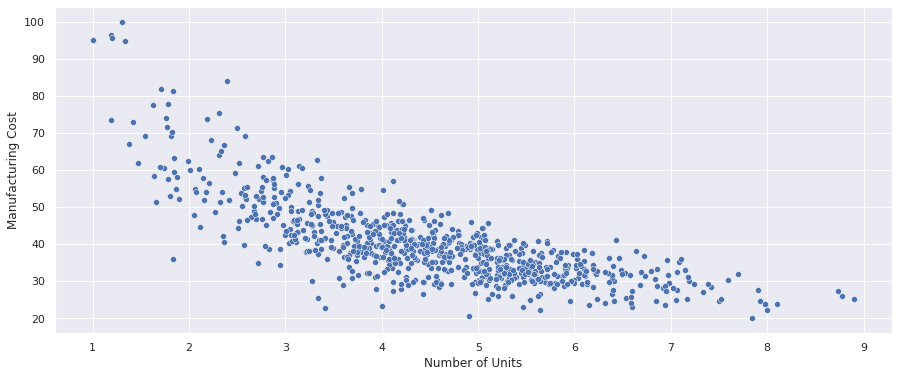

In [ ]:
sns.scatterplot(x = Xtrain['Number of Units'], y = ytrain)
plt.show()

Estimacion de modelo

In [ ]:
lrm = LinearRegression()
lrm.fit(Xtrain, ytrain)
yhatTr = lrm.predict(Xtrain)
yhatTe = lrm.predict(Xtest)

In [ ]:
lrm.coef_, lrm.intercept_

(array([-6.16447792]), 67.65595280709573)

Ecuacion de modelo generado: 

$\hat{y} =  -6.18X + 67.69$

Visualizacion

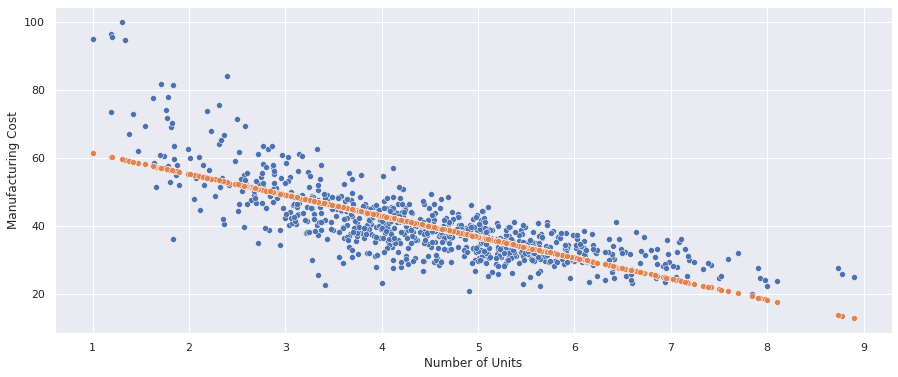

In [ ]:
sns.scatterplot(x = Xtrain['Number of Units'], y = ytrain)
sns.scatterplot(x = Xtrain['Number of Units'], y = yhatTr)
plt.show()

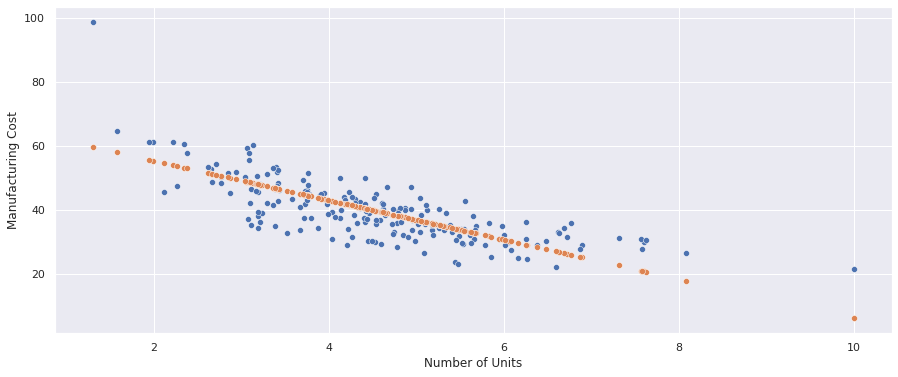

In [ ]:
sns.scatterplot(x = Xtest['Number of Units'], y = ytest)
sns.scatterplot(x = Xtest['Number of Units'], y = yhatTe)
plt.show()

Errores

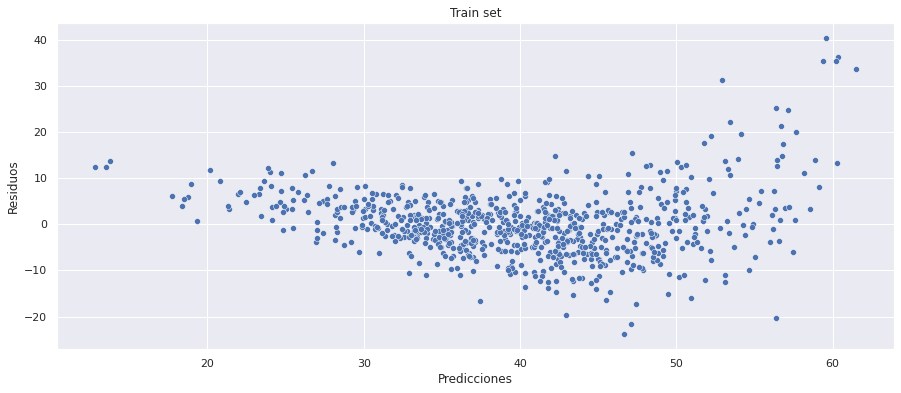

In [ ]:
Residuos =  ytrain - yhatTr
sns.scatterplot(x = yhatTr, y = Residuos)
plt.title('Train set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

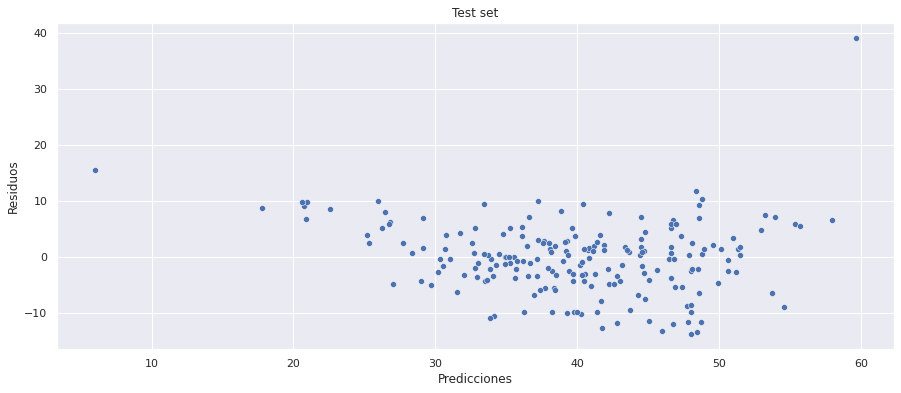

In [ ]:
Residuos =  ytest - yhatTe
sns.scatterplot(x = yhatTe, y = Residuos)
plt.title('Test set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

$R^2$

In [ ]:
print('R^2 train set:', r2_score(ytrain, yhatTr))
print('R^2 test set:', r2_score(ytest, yhatTe))

R^2 train set: 0.5808784065422798
R^2 test set: 0.5667416181651725


In [ ]:
RegLinR2_tr = r2_score(ytrain, yhatTr)
RegLinR2_te = r2_score(ytest, yhatTe)
RegLinMAE_tr = mean_absolute_error(ytrain, yhatTr)
RegLinMAE_te = mean_absolute_error(ytest, yhatTe)

## 1.3 Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [ ]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
XtrainP5 = poly.fit_transform(Xtrain)
XtestP5 = poly.fit_transform(Xtest)
XtestP5.shape

(200, 5)

In [ ]:
lrm = LinearRegression()
lrm.fit(XtrainP5, ytrain)
yhatTr = lrm.predict(XtrainP5)
yhatTe = lrm.predict(XtestP5)

In [ ]:
lrm.coef_, lrm.intercept_

(array([-9.12790939e+01,  3.06981507e+01, -5.50730753e+00,  4.96405869e-01,
        -1.76585098e-02]), 158.0608084083559)

Ecuacion de modelo generado: 

$\hat{y} =  154.71 - 88.70X + 29.6x^2 - 5.18x^3 + 0.45x^4 - 0.0152x^5$ 

Visualizacion

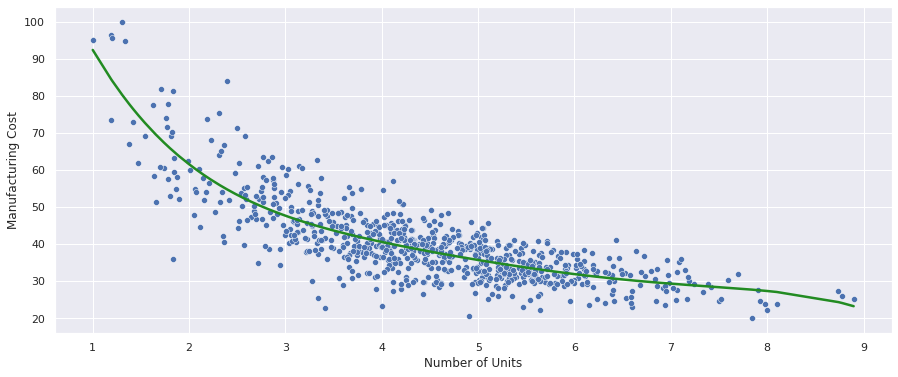

In [ ]:
sns.scatterplot(x = Xtrain['Number of Units'], y = ytrain)
sns.lineplot(x = Xtrain['Number of Units'], y = yhatTr, color='forestgreen', linewidth = 2.5)
plt.show()

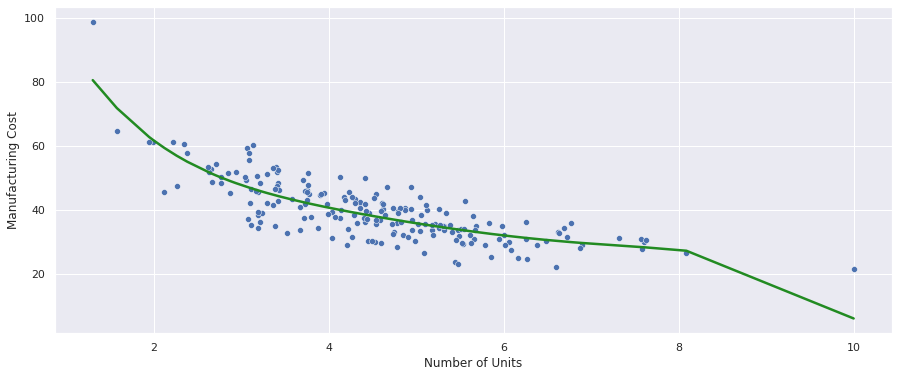

In [ ]:
sns.scatterplot(x = Xtest['Number of Units'], y = ytest)
sns.lineplot(x = Xtest['Number of Units'], y = yhatTe, color='forestgreen', linewidth = 2.5)
plt.show()

Errores

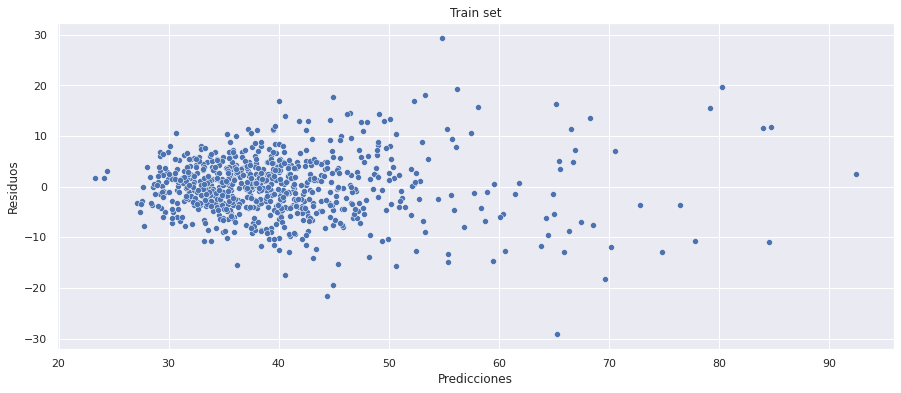

In [ ]:
Residuos =  ytrain - yhatTr
sns.scatterplot(x = yhatTr, y = Residuos)
plt.title('Train set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

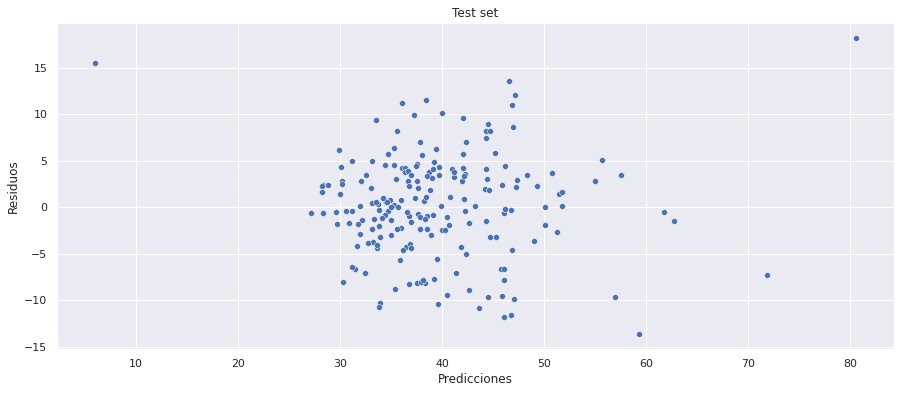

In [ ]:
Residuos =  ytest - yhatTe
sns.scatterplot(x = yhatTe, y = Residuos)
plt.title('Test set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

$R^2$

In [ ]:
print('R^2 train set:', r2_score(ytrain, yhatTr))
print('R^2 test set:', r2_score(ytest, yhatTe))

R^2 train set: 0.6973553976698312
R^2 test set: 0.6775729516958504


In [ ]:
RegPolyR2_tr = r2_score(ytrain, yhatTr)
RegPolyR2_te = r2_score(ytest, yhatTe)
RegPolyMAE_tr = mean_absolute_error(ytrain, yhatTr)
RegPolyMAE_te = mean_absolute_error(ytest, yhatTe)

## 1.4 Realiza la regresión con Ridge y Lasso. 
Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [ ]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
XtrainP5 = poly.fit_transform(Xtrain)
XtestP5 = poly.fit_transform(Xtest)
XtestP5.shape

(200, 5)

Ridge

In [ ]:
lrm = Ridge(alpha = 0.1)
lrm.fit(XtrainP5, ytrain)
yhatTr = lrm.predict(XtrainP5)
yhatTe = lrm.predict(XtestP5)

In [ ]:
lrm.coef_, lrm.intercept_

(array([-4.50218556e+01,  8.07380271e+00, -4.10033718e-01, -3.99775277e-02,
         3.64078653e-03]), 123.93160179730302)

Ecuacion de modelo generado: 

$\hat{y} =  154.71 - 49.5X + 16.61x^2 - 1.41x^3 + 0.081x^4 - 0.001661x^5$ 

Visualizacion

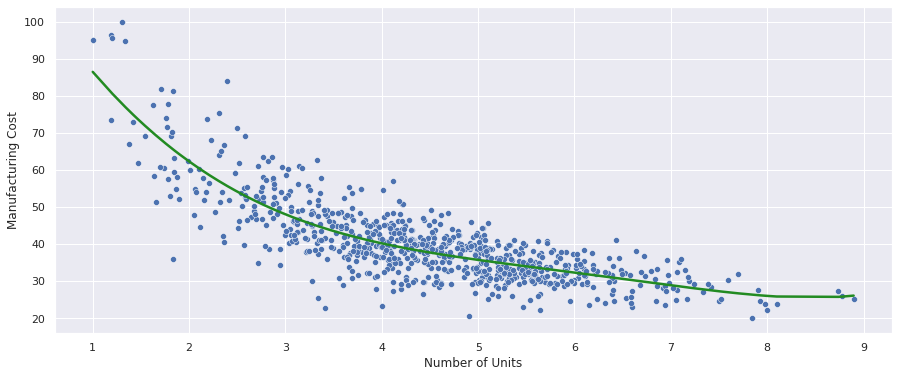

In [ ]:
sns.scatterplot(x = Xtrain['Number of Units'], y = ytrain)
sns.lineplot(x = Xtrain['Number of Units'], y = yhatTr, color='forestgreen', linewidth = 2.5)
plt.show()

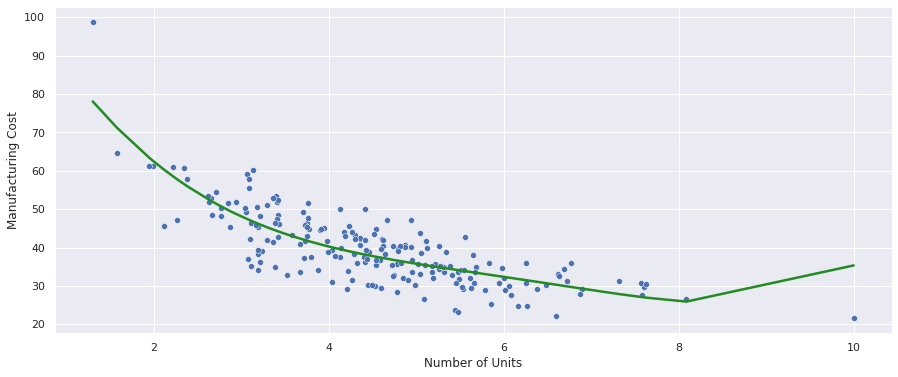

In [ ]:
sns.scatterplot(x = Xtest['Number of Units'], y = ytest)
sns.lineplot(x = Xtest['Number of Units'], y = yhatTe, color='forestgreen', linewidth = 2.5)
plt.show()

Errores

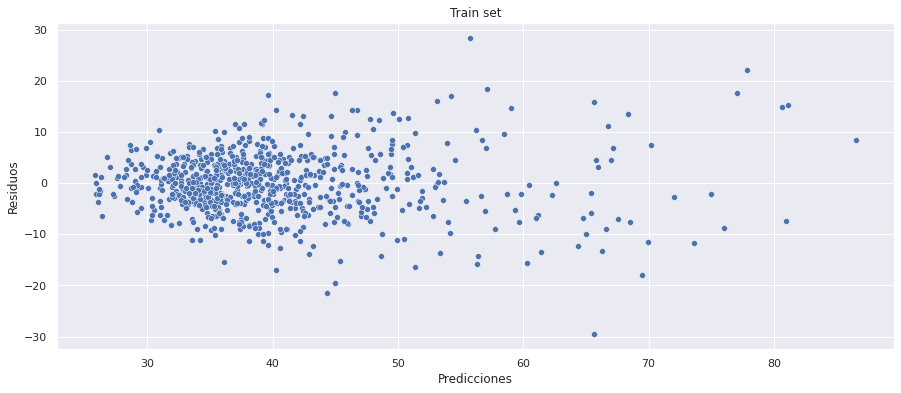

In [ ]:
Residuos =  ytrain - yhatTr
sns.scatterplot(x = yhatTr, y = Residuos)
plt.title('Train set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

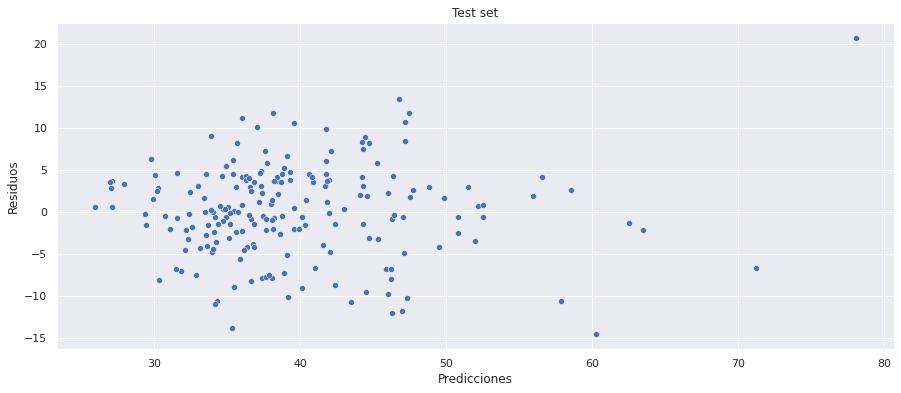

In [ ]:
Residuos =  ytest - yhatTe
sns.scatterplot(x = yhatTe, y = Residuos)
plt.title('Test set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

$R^2$

In [ ]:
print('R^2 train set:', r2_score(ytrain, yhatTr))
print('R^2 test set:', r2_score(ytest, yhatTe))

R^2 train set: 0.6949357869347463
R^2 test set: 0.6694821597484484


In [ ]:
RegRidR2_tr = r2_score(ytrain, yhatTr)
RegRidR2_te = r2_score(ytest, yhatTe)
RegRidMAE_tr = mean_absolute_error(ytrain, yhatTr)
RegRidMAE_te = mean_absolute_error(ytest, yhatTe)

Lasso

In [ ]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
XtrainP5 = poly.fit_transform(Xtrain)
XtestP5 = poly.fit_transform(Xtest)
XtestP5.shape

(200, 5)

In [ ]:
lrm = Lasso(alpha = 0.1)
lrm.fit(XtrainP5, ytrain)
yhatTr = lrm.predict(XtrainP5)
yhatTe = lrm.predict(XtestP5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.711e+03, tolerance: 9.371e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
lrm.coef_, lrm.intercept_

(array([-1.58558736e+01, -4.62991046e-02,  2.45807521e-01, -3.81306524e-03,
        -1.36060698e-03]), 91.44244561722766)

Ecuacion de modelo generado: 

$\hat{y} =  86.26 - 13.73X - 0.043x^2 - 0.19x^3 + 0.0044x^4 - 0.0001661x^5$ 

Visualizacion

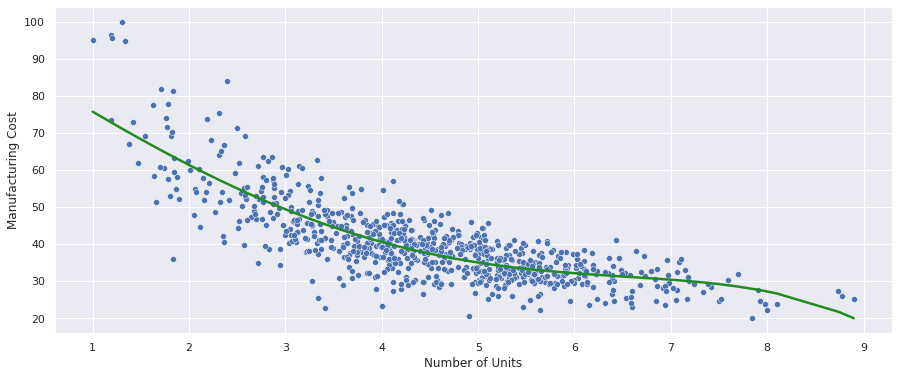

In [ ]:
sns.scatterplot(x = Xtrain['Number of Units'], y = ytrain)
sns.lineplot(x = Xtrain['Number of Units'], y = yhatTr, color='forestgreen', linewidth = 2.5)
plt.show()

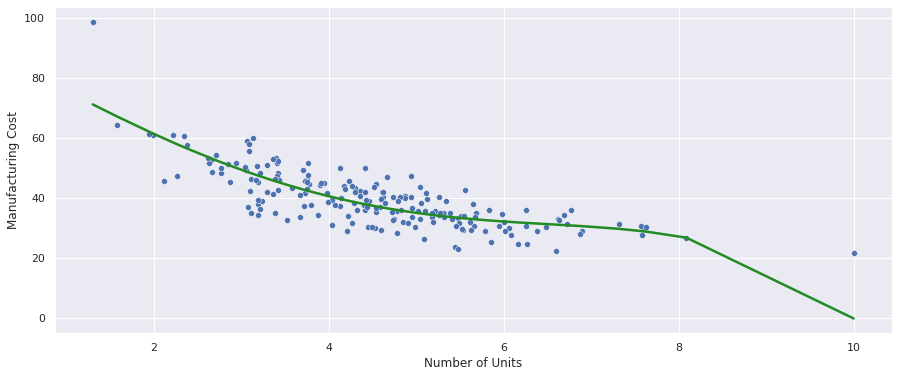

In [ ]:
sns.scatterplot(x = Xtest['Number of Units'], y = ytest)
sns.lineplot(x = Xtest['Number of Units'], y = yhatTe, color='forestgreen', linewidth = 2.5)
plt.show()

Errores

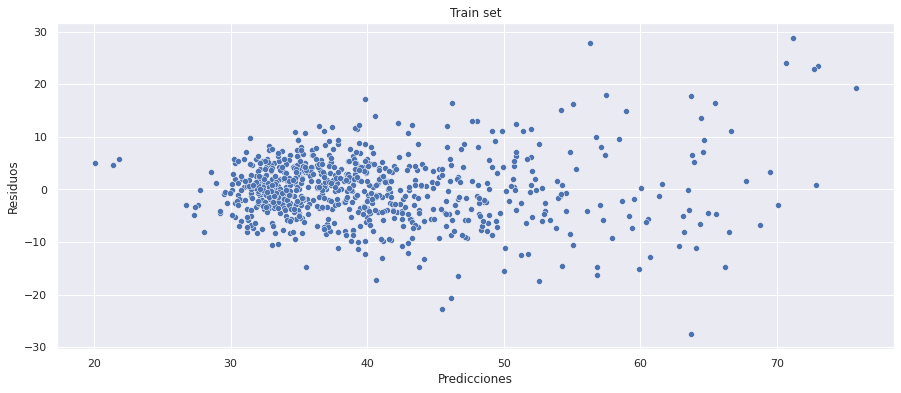

In [ ]:
Residuos =  ytrain - yhatTr
sns.scatterplot(x = yhatTr, y = Residuos)
plt.title('Train set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

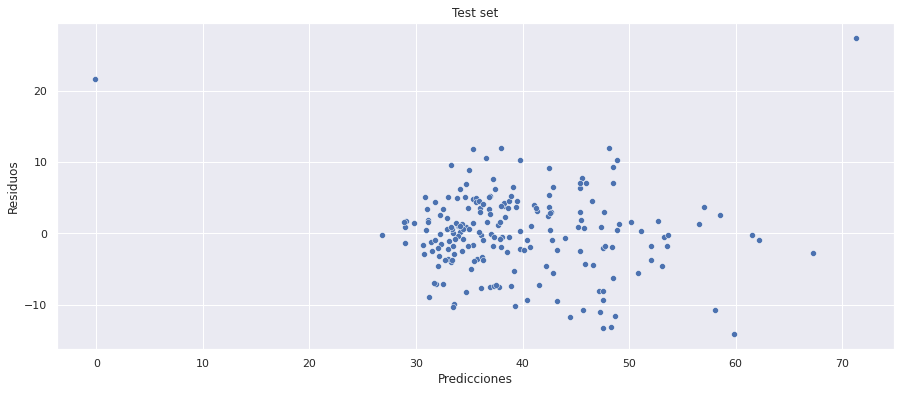

In [ ]:
Residuos =  ytest - yhatTe
sns.scatterplot(x = yhatTe, y = Residuos)
plt.title('Test set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

$R^2$

In [ ]:
print('R^2 train set:', r2_score(ytrain, yhatTr))
print('R^2 test set:', r2_score(ytest, yhatTe))

R^2 train set: 0.6795630505775527
R^2 test set: 0.6381931774296905


In [ ]:
RegLassoR2_tr = r2_score(ytrain, yhatTr)
RegLassoR2_te = r2_score(ytest, yhatTe)
RegLassoMAE_tr = mean_absolute_error(ytrain, yhatTr)
RegLassoMAE_te = mean_absolute_error(ytest, yhatTe)

## 1.5 Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

In [ ]:
GraficoR2 = {'RegLinR2_te': [RegLinR2_te],
           'RegPolyR2_te': [RegPolyR2_te],
           'RegRidR2_te': [RegRidR2_te],
           'RegLassoR2_te': [RegLassoR2_te]}
GraficoR2_Df = pd.DataFrame(GraficoR2)

GraficoMAE = {'RegLinMAE_te': [RegLinMAE_te],
           'RegPolyMAE_te': [RegPolyMAE_te],
           'RegRidMAE_te': [RegRidMAE_te],
           'RegLassoMAE_te': [RegLassoMAE_te]}
GraficoMAE_Df = pd.DataFrame(GraficoMAE)

In [ ]:
GraficoR2_Df

,RegLinR2_te,RegPolyR2_te,RegRidR2_te,RegLassoR2_te
0,0.566742,0.677573,0.669482,0.638193


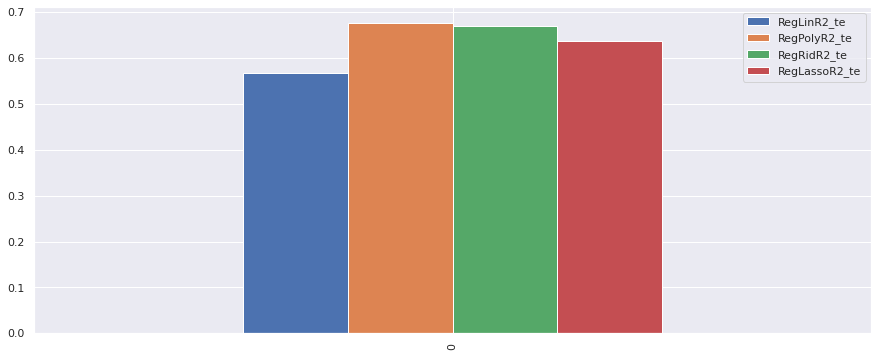

In [ ]:
GraficoR2_Df.plot.bar()

In [ ]:
GraficoMAE_Df

,RegLinMAE_te,RegPolyMAE_te,RegRidMAE_te,RegLassoMAE_te
0,4.6429,4.191007,4.243829,4.250622


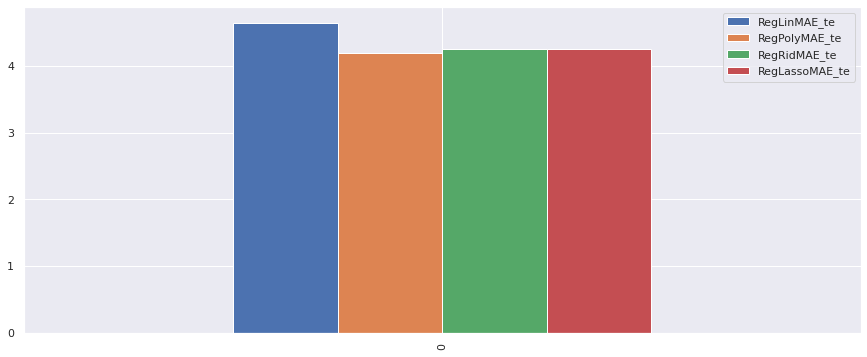

In [ ]:
GraficoMAE_Df.plot.bar()

## 1.6 Explica tus resultados:
Que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18422,5153200506,20140731T000000,217000.0,3,1.00,1000,12000,1.0,0,0,...,7,1000,0,1959,0,98023,47.3321,-122.346,1490,14940
18699,3031200205,20140724T000000,415000.0,5,2.75,2060,8906,1.0,0,0,...,7,1220,840,1978,0,98118,47.5358,-122.289,1840,8906
3481,6625910100,20150203T000000,415000.0,3,2.25,2180,11100,1.0,0,0,...,8,1700,480,1979,0,98056,47.5162,-122.176,2350,11397
9844,9552701000,20150316T000000,818000.0,4,2.25,2460,8001,2.0,0,0,...,8,2460,0,1984,0,98006,47.5480,-122.154,2460,9126
1840,290000055,20140516T000000,720000.0,2,1.00,2020,7200,1.0,0,3,...,7,1700,320,1947,0,98146,47.5060,-122.384,2020,7200
11044,9407001620,20140812T000000,280000.0,3,2.50,1370,22326,2.0,0,0,...,7,1370,0,1993,0,98045,47.4469,-121.775,1580,10920
17480,1525079056,20140502T000000,284000.0,3,1.75,1800,23103,1.0,0,0,...,7,1800,0,1968,0,98014,47.6517,-121.906,1410,18163
8316,7385310040,20140605T000000,725000.0,4,2.75,2420,10962,1.0,0,0,...,8,1530,890,1977,0,98007,47.6218,-122.152,2620,13200
15815,2129700525,20141028T000000,322000.0,3,1.75,1400,18002,1.0,0,0,...,6,1400,0,1977,0,98019,47.7250,-121.967,2240,14068
6857,9407110680,20141008T000000,280000.0,3,1.50,1370,11400,2.0,0,0,...,7,1370,0,1980,0,98045,47.4477,-121.770,1390,9600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']]
df.shape

(21613, 16)

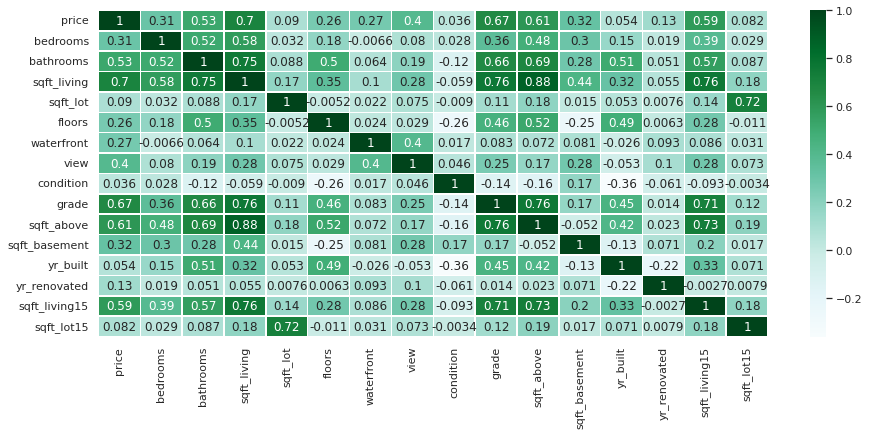

In [ ]:
sns.set(rc={'figure.figsize':(15,6)})
sns.heatmap(df.corr(method='pearson'), annot = True, linewidths=.5, cmap = 'BuGn')

In [ ]:
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade',
      'sqft_above', 'sqft_basement', 'yr_renovated','sqft_living15']]

In [ ]:
# df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
#           'view', 'grade',
#        'sqft_above',  'sqft_living15']]

## 1.1 Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [ ]:
X = df.drop(labels = 'price', axis = 1)
y = df['price']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

## 1.2 Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

Estimacion de modelo

In [ ]:
lrm = LinearRegression()
lrm.fit(Xtrain, ytrain)
yhatTr = lrm.predict(Xtrain)
yhatTe = lrm.predict(Xtest)

In [ ]:
lrm.coef_, lrm.intercept_

(array([-2.92852209e+04, -1.88302051e+04,  1.34686077e+02, -8.75126057e+03,
         6.12152867e+05,  5.59439718e+04,  1.00411741e+05,  4.58891526e+01,
         8.87969245e+01,  6.43035338e+01,  8.97535596e+00]),
 -506138.95748410595)

Ecuacion de modelo generado: 

$\hat{y} =  -6.18X + 67.69$

Errores

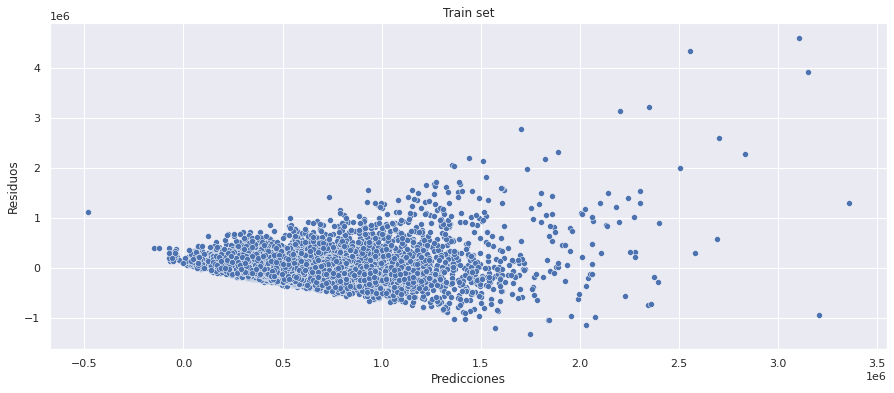

In [ ]:
Residuos =  ytrain - yhatTr
sns.scatterplot(x = yhatTr, y = Residuos)
plt.title('Train set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

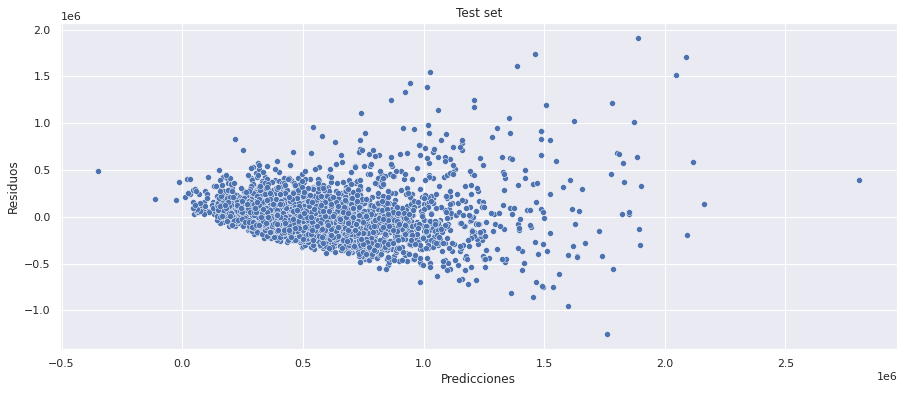

In [ ]:
Residuos =  ytest - yhatTe
sns.scatterplot(x = yhatTe, y = Residuos)
plt.title('Test set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

$R^2$

In [ ]:
print('R^2 train set:', r2_score(ytrain, yhatTr))
print('R^2 test set:', r2_score(ytest, yhatTe))

R^2 train set: 0.5979997527088691
R^2 test set: 0.614421688148644


In [ ]:
RegLinR2_tr = r2_score(ytrain, yhatTr)
RegLinR2_te = r2_score(ytest, yhatTe)
RegLinMAE_tr = mean_absolute_error(ytrain, yhatTr)
RegLinMAE_te = mean_absolute_error(ytest, yhatTe)

## 1.3 Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [ ]:
poly = PolynomialFeatures(degree = 3, include_bias=False)
XtrainP5 = poly.fit_transform(Xtrain)
XtestP5 = poly.fit_transform(Xtest)
XtestP5.shape

(4323, 363)

In [ ]:
lrm = LinearRegression()
lrm.fit(XtrainP5, ytrain)
yhatTr = lrm.predict(XtrainP5)
yhatTe = lrm.predict(XtestP5)

In [ ]:
lrm.coef_, lrm.intercept_

(array([-3.91359905e+04,  6.55379607e+05, -1.67429553e+02,  9.37917309e+05,
         1.03398573e+04,  2.15936810e+05, -5.39243874e+04,  2.27841315e+02,
        -4.12663737e+02, -1.75689736e+04, -1.72617484e+00, -2.49619416e+04,
        -3.17657531e+03,  4.17437451e+01,  2.50823197e+05,  1.84124686e+04,
        -2.81783761e+04, -3.68116907e+04, -3.44921102e+01,  8.89193516e+01,
        -3.09017188e+02,  2.74137257e+00, -5.76899480e+04,  1.56176882e+02,
        -2.12699521e+05, -1.17996351e+06,  1.48016392e+05, -1.43264598e+05,
         2.34134575e+00,  1.55540672e+02, -7.46517777e+02,  2.25792114e+01,
         1.74048432e-01,  8.05151125e+01,  5.89414319e+02,  1.87108342e+01,
         1.31026148e+00, -3.16013858e-01, -2.63025824e-01,  2.00532901e+00,
         1.19502266e-01, -9.89111762e+05,  1.75702378e+06, -1.22647655e+05,
         2.10720535e+05, -2.07787003e+02,  2.88298040e+02, -1.12547914e+03,
        -1.17189741e+02,  1.03435941e+04, -8.22844742e+04, -8.19642102e+03,
        -1.0

Ecuacion de modelo generado: 

$\hat{y} =  154.71 - 88.70X + 29.6x^2 - 5.18x^3 + 0.45x^4 - 0.0152x^5$ 

Errores

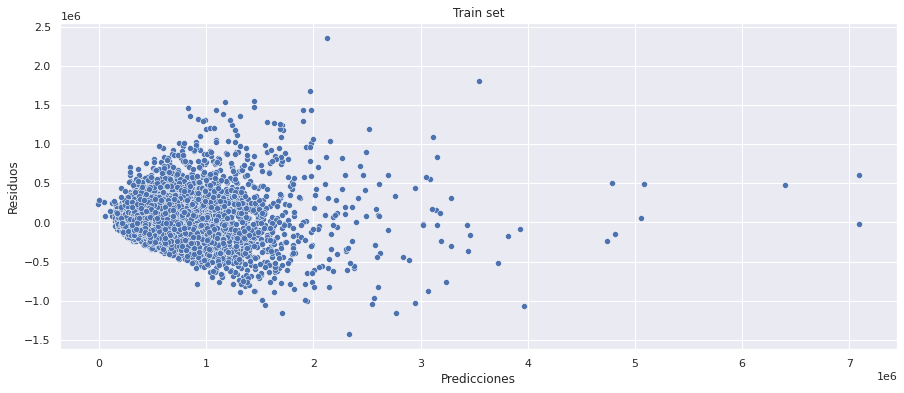

In [ ]:
Residuos =  ytrain - yhatTr
sns.scatterplot(x = yhatTr, y = Residuos)
plt.title('Train set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

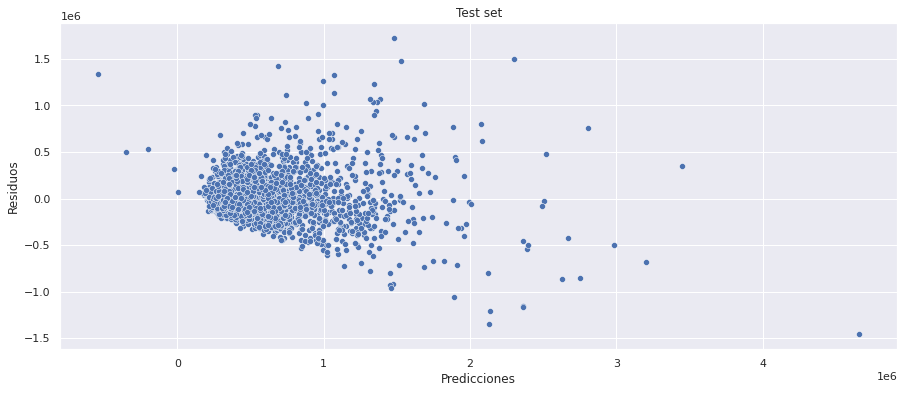

In [ ]:
Residuos =  ytest - yhatTe
sns.scatterplot(x = yhatTe, y = Residuos)
plt.title('Test set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

$R^2$

In [ ]:
print('R^2 train set:', r2_score(ytrain, yhatTr))
print('R^2 test set:', r2_score(ytest, yhatTe))

R^2 train set: 0.7316686449702545
R^2 test set: 0.6622242534906233


In [ ]:
RegPolyR2_tr = r2_score(ytrain, yhatTr)
RegPolyR2_te = r2_score(ytest, yhatTe)
RegPolyMAE_tr = mean_absolute_error(ytrain, yhatTr)
RegPolyMAE_te = mean_absolute_error(ytest, yhatTe)

## 1.4 Realiza la regresión con Ridge y Lasso. 
Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [ ]:
poly = PolynomialFeatures(degree = 3, include_bias=False)
# XtrainP5 = poly.fit_transform(Xtrain)
# XtestP5 = poly.fit_transform(Xtest)
XtrainP5 = Xtrain
XtestP5 = Xtest
XtestP5.shape

(4323, 11)

Ridge

In [ ]:
lrm = Ridge(alpha = 0.1)
lrm.fit(XtrainP5, ytrain)
yhatTr = lrm.predict(XtrainP5)
yhatTe = lrm.predict(XtestP5)

In [ ]:
lrm.coef_, lrm.intercept_

(array([-2.92880307e+04, -1.88294325e+04,  1.34689012e+02, -8.75069756e+03,
         6.11575207e+05,  5.59699618e+04,  1.00408582e+05,  4.58932336e+01,
         8.87943008e+01,  6.43101425e+01,  8.97214537e+00]),
 -506116.3609423854)

Ecuacion de modelo generado: 

$\hat{y} =  154.71 - 49.5X + 16.61x^2 - 1.41x^3 + 0.081x^4 - 0.001661x^5$ 

Errores

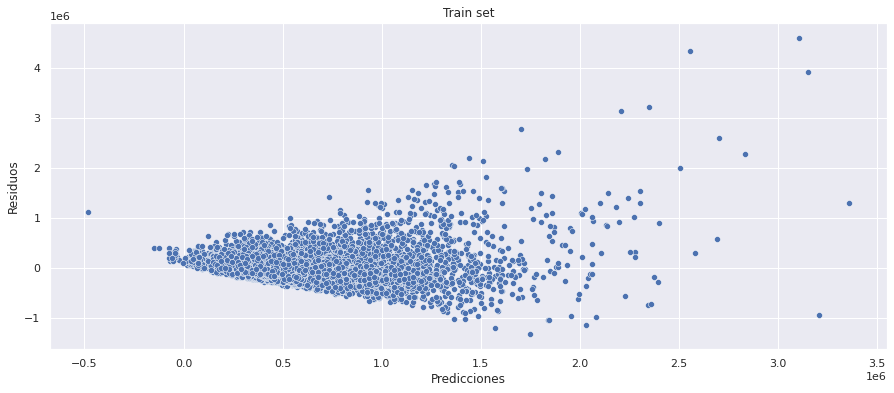

In [ ]:
Residuos =  ytrain - yhatTr
sns.scatterplot(x = yhatTr, y = Residuos)
plt.title('Train set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

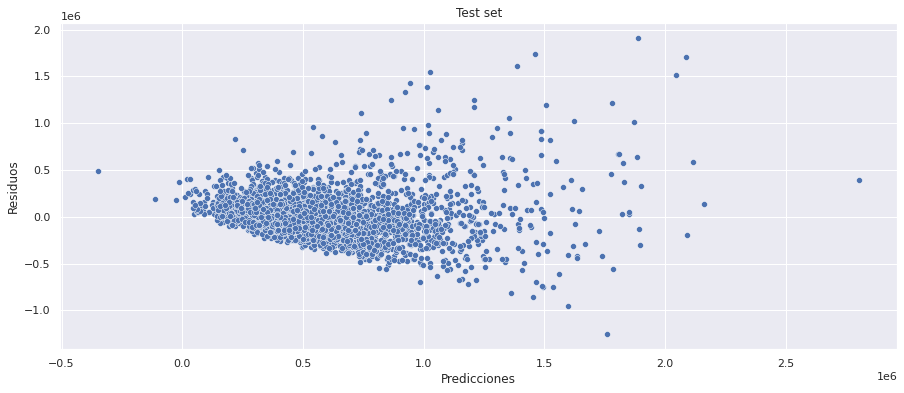

In [ ]:
Residuos =  ytest - yhatTe
sns.scatterplot(x = yhatTe, y = Residuos)
plt.title('Test set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

$R^2$

In [ ]:
print('R^2 train set:', r2_score(ytrain, yhatTr))
print('R^2 test set:', r2_score(ytest, yhatTe))

R^2 train set: 0.5979997378375346
R^2 test set: 0.6144335005879769


In [ ]:
RegRidR2_tr = r2_score(ytrain, yhatTr)
RegRidR2_te = r2_score(ytest, yhatTe)
RegRidMAE_tr = mean_absolute_error(ytrain, yhatTr)
RegRidMAE_te = mean_absolute_error(ytest, yhatTe)

Lasso

In [ ]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
# XtrainP5 = poly.fit_transform(Xtrain)
# XtestP5 = poly.fit_transform(Xtest)
XtrainP5 = Xtrain
XtestP5 = Xtest
XtestP5.shape

(4323, 11)

In [ ]:
lrm = Lasso(alpha = 0.1)
lrm.fit(XtrainP5, ytrain)
yhatTr = lrm.predict(XtrainP5)
yhatTe = lrm.predict(XtestP5)

In [ ]:
lrm.coef_, lrm.intercept_

(array([-2.92852023e+04, -1.88299173e+04,  3.02317300e+02, -8.75074807e+03,
         6.12137248e+05,  5.59445223e+04,  1.00411386e+05, -1.21742092e+02,
        -7.88342349e+01,  6.43037237e+01,  8.97549164e+00]),
 -506137.95705406833)

Ecuacion de modelo generado: 

$\hat{y} =  86.26 - 13.73X - 0.043x^2 - 0.19x^3 + 0.0044x^4 - 0.0001661x^5$ 

Errores

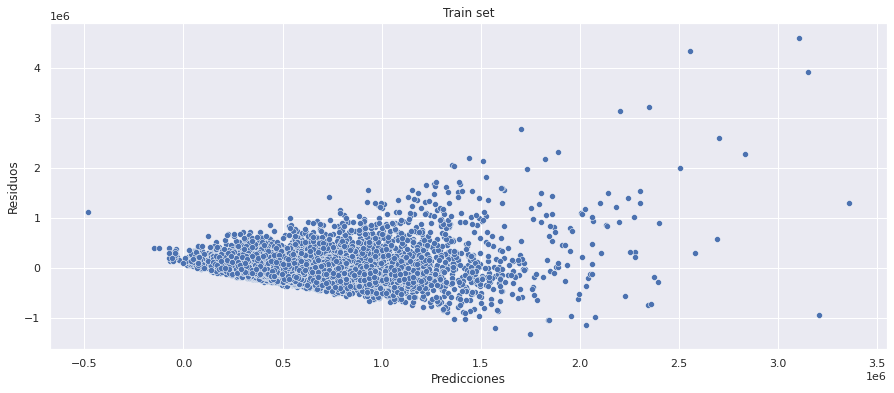

In [ ]:
Residuos =  ytrain - yhatTr
sns.scatterplot(x = yhatTr, y = Residuos)
plt.title('Train set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

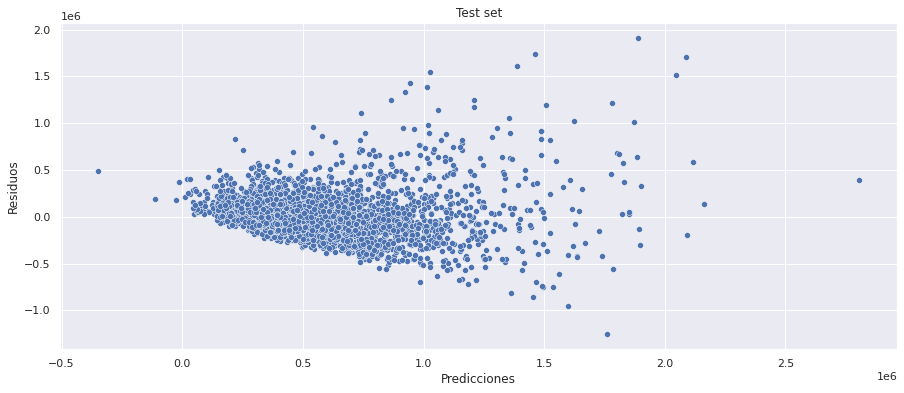

In [ ]:
Residuos =  ytest - yhatTe
sns.scatterplot(x = yhatTe, y = Residuos)
plt.title('Test set')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

$R^2$

In [ ]:
print('R^2 train set:', r2_score(ytrain, yhatTr))
print('R^2 test set:', r2_score(ytest, yhatTe))

R^2 train set: 0.5979997526970053
R^2 test set: 0.6144219866216609


In [ ]:
RegLassoR2_tr = r2_score(ytrain, yhatTr)
RegLassoR2_te = r2_score(ytest, yhatTe)
RegLassoMAE_tr = mean_absolute_error(ytrain, yhatTr)
RegLassoMAE_te = mean_absolute_error(ytest, yhatTe)

## 1.5 Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

In [ ]:
GraficoR2 = {'RegLinR2_te': [RegLinR2_te],
           'RegPolyR2_te': [RegPolyR2_te],
           'RegRidR2_te': [RegRidR2_te],
           'RegLassoR2_te': [RegLassoR2_te]}
GraficoR2_Df = pd.DataFrame(GraficoR2)

GraficoMAE = {'RegLinMAE_te': [RegLinMAE_te],
           'RegPolyMAE_te': [RegPolyMAE_te],
           'RegRidMAE_te': [RegRidMAE_te],
           'RegLassoMAE_te': [RegLassoMAE_te]}
GraficoMAE_Df = pd.DataFrame(GraficoMAE)

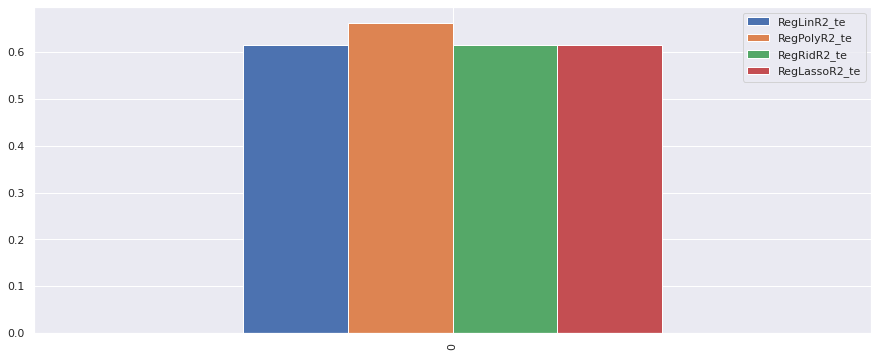

In [ ]:
GraficoR2_Df.plot.bar()

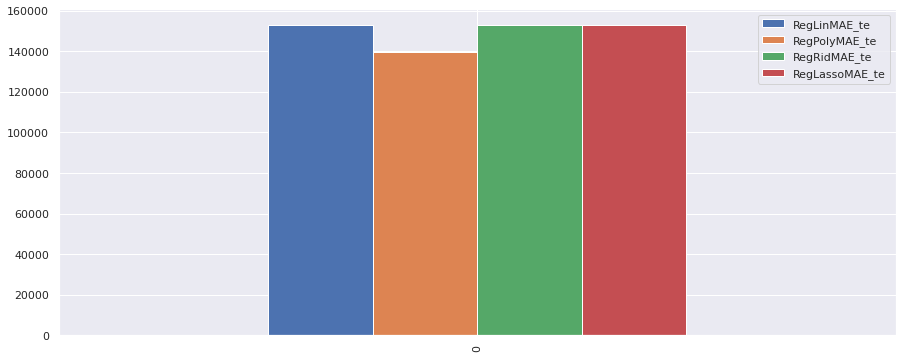

In [ ]:
GraficoMAE_Df.plot.bar()